### 앙상블 기법
* 무작위로 선택된 수천명의 사람들에게 복잡하거나 어려운 질문을 하고 대답을 모은다고 가정
* 이렇게 모아진 답은 한명의 전문가의 답보다 나을 수 있음
    - 집단지성, 대중의 지혜

* 이처럼 일련의 분석기/예측기로 부터 예측을 수집하면 가장 좋은 하나의 모델보다 더 좋은 예측을 얻을 수 있음
* 일련의 분석기/예측기 => 앙상블
* 앙상블을 통해 학습 => 앙상블 학습
* 앙상블 학습 알고리즘 => 보팅, 베깅, 부스팅, 스태킹
* 머신러닝 경진대회에서 우승하고 싶다면?
    - 여러 앙상블 방법을 이용!


### 투표기반 분류기votting
* 정확도가 좋은 분류기 여러개를 이용해서 학습시킴
     - 로지스틱/SVM/랜덤포레스트/K최근접이웃 등등

* 각 분류기로 부터 예측을 모아 가장 많이 선택된 클래스를 예측함 => 큰수의 법칙
* 하드보팅   : 다수결 투표로 결정함, 직접투표분류기
* 소프트보팅 : 확률의 총합으로 결정, 간접투표분류기
* sklearn에서는 VotingClassifier 제공

In [1]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

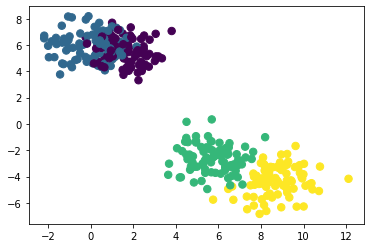

In [2]:
# 테스트용 데이터 생성 및 시각화
X, y = make_blobs(n_samples=350, centers=4,random_state=2111111535, cluster_std=1.0)

plt.scatter(X[:,0], X[:,1], c=y, s=55)

In [3]:
# 데이터 분할

Xtrain, Xtest, ytrain, ytest = train_test_split( X, y, stratify=y, test_size=0.3, random_state=2111111535)

In [4]:
# 투표분류기 생성1
# 직접투표hardvoting: 모든 분류기가 클래스를 예측해서 개별분류기의 최빈값을 계산하고, 빈도값이 높은 클래스를 채택
# 개별 분류기 정의
lcf = LogisticRegression(max_iter=1000)
rfcf = RandomForestClassifier()
svcf = SVC()

In [5]:
# 튜표분류기 정의
# voting : 투표방식 지정 (soft/hard)
# estimators :투표분류기에 사용할 개별 분류기 지정
voteclf = VotingClassifier(voting='hard',estimators=[('lr',lcf),('rf',rfcf),('sv',svcf)])

In [6]:
# 훈련 및 평가

for cf in (lcf, rfcf, svcf, voteclf):
    cf.fit(Xtrain, ytrain)
    pred = cf.predict(Xtest)
    print(cf.__class__.__name__,cf.score(Xtrain, ytrain), accuracy_score(ytest, pred))  
    # 분류기 이름과 훈련/평가 정확도 출력

LogisticRegression 0.8816326530612245 0.9428571428571428
RandomForestClassifier 1.0 0.9047619047619048
SVC 0.8693877551020408 0.9428571428571428
VotingClassifier 0.8857142857142857 0.9333333333333333


/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')
/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')
/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')
/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


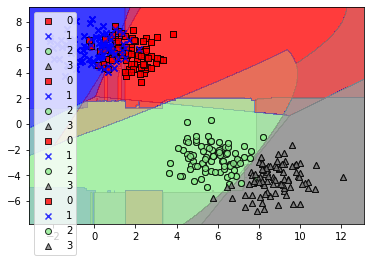

In [7]:
# 결정영역 시각화
import mldlpy3

mldlpy3.plot_decision_regions(X, y, lcf)
mldlpy3.plot_decision_regions(X, y, rfcf)
mldlpy3.plot_decision_regions(X, y, svcf)
mldlpy3.plot_decision_regions(X, y, voteclf)

In [8]:
# 투표분류기 생성2
# 간접투표softvoting: 모든 분류기가 클래스의 확률을 예측해서 개별분류기의 평균을 계산하고, 확률이 높은 클래스를 채택
lcf = LogisticRegression(max_iter=1000)
rfcf = RandomForestClassifier()
svcf = SVC(probability=True)    # 확률예측

voteclf = VotingClassifier(voting='soft',estimators=[('lr',lcf),('rf',rfcf),('sv',svcf)])

In [9]:
# 훈련 및 평가

for cf in (lcf, rfcf, svcf, voteclf):
    cf.fit(Xtrain, ytrain)
    pred = cf.predict_proba(Xtest)  # 확률예측
    print(cf.__class__.__name__, cf.score(Xtrain, ytrain), cf.score(Xtest, ytest))  
    # 분류기 이름과 훈련/평가 정확도 출력

LogisticRegression 0.8816326530612245 0.9428571428571428
RandomForestClassifier 1.0 0.8857142857142857
SVC 0.8693877551020408 0.9428571428571428
VotingClassifier 0.9306122448979591 0.9333333333333333


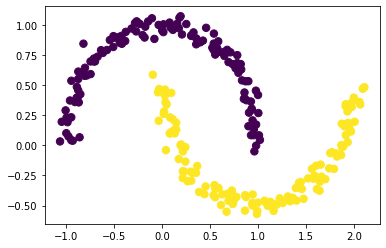

In [20]:
# 테스트용 데이터 생성 및 시각화 2
X, y = make_moons(n_samples=250, noise=0.05, random_state=2111111615)
plt.scatter(X[:,0],X[:,1], c=y, s=55)

In [22]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, stratify=y,test_size=0.3, random_state=2111111615)

In [23]:
lcf = LogisticRegression(max_iter=1000)
rfcf = RandomForestClassifier()
kcf = KNeighborsClassifier()
svcf = SVC()

In [27]:
voteclf = VotingClassifier(voting='hard', estimators=[('lr',lcf),('rf',rfcf),('sv',svcf),('kcf', kcf)])

In [29]:
# 훈련 및 평가
for cf in (lcf, rfcf, svcf, kcf, voteclf):
    cf.fit(Xtrain, ytrain)
    pred = cf.predict(Xtest)  # 확률예측
    print(cf.__class__.__name__,cf.score(Xtrain, ytrain),cf.score(Xtest, ytest))  
    # 분류기 이름과 훈련/평가 정확도 출력

LogisticRegression 0.8971428571428571 0.8533333333333334
RandomForestClassifier 1.0 0.9733333333333334
SVC 1.0 1.0
KNeighborsClassifier 1.0 1.0
VotingClassifier 1.0 0.9866666666666667


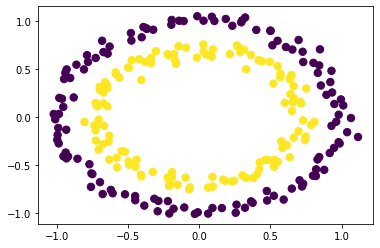

In [30]:
# 테스트용 데이터 생성 및 시각화 3
X, y = make_circles(n_samples=250, noise=0.05,factor=0.7, random_state=2111111615)
plt.scatter(X[:,0],X[:,1], c=y, s=55)